# Process of results

First some imports

In [1]:
import os
import os.path

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

Next, we read all finalized CSV files from the given `input_directory`:

In [2]:
input_directory = Path("./results/cg")
output_directory = Path("./results/cg")

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=["results.csv"],
    exclude=["checkpoint", "validation"]
)
analysis_df = df.copy()

Let's look at the initial result

In [3]:
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,results/polyhedral-total-seed-1999,0,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.345977e-08,0.000035,0.026418,0.033961,0.374827,0.165426,0.054045,0.057224,0.391516,0.152814
1,churyumov-gerasimenko,results/polyhedral-total-seed-1999,1,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.563376e-08,0.000040,0.631426,0.789039,2.486944,1.222109,0.603926,0.652308,2.224196,0.800178
2,churyumov-gerasimenko,results/polyhedral-total-seed-1999,2,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,7.519427e-09,0.000019,0.523093,0.656178,2.153486,0.906739,0.599081,0.645885,2.247042,0.812963
3,churyumov-gerasimenko,results/polyhedral-total-seed-1999,3,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,1.291185e-07,0.000331,0.043948,0.055608,0.486524,0.193223,0.085930,0.092383,0.609533,0.216485
4,churyumov-gerasimenko,results/polyhedral-total-seed-1999,4,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,5.505671e-07,0.001413,0.710257,0.890139,2.648758,1.234736,0.750726,0.810724,2.634546,0.946690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,churyumov-gerasimenko,results/polyhedral-total-seed-2023,31,2500,2023,mascon,normalized_L1_loss,1000,0.0001,10000,...,3.546558e-07,0.000909,0.742448,0.937306,2.756093,1.291627,0.642516,0.695314,2.376003,0.865262
356,churyumov-gerasimenko,results/polyhedral-total-seed-2023,32,2500,2023,mascon,normalized_L1_loss,1000,0.0001,10000,...,2.384169e-07,0.000611,0.616820,0.776072,2.338498,1.031604,0.715005,0.775943,2.476317,0.898570
357,churyumov-gerasimenko,results/polyhedral-total-seed-2023,33,2500,2023,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.801318e-07,0.000462,0.141083,0.185203,0.666376,0.315015,0.201434,0.220102,1.002989,0.388876
358,churyumov-gerasimenko,results/polyhedral-total-seed-2023,34,2500,2023,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.069706e-06,0.002742,0.669674,0.839393,2.537880,1.179574,0.747790,0.807569,2.546966,0.910057


And save the unmodified concatenated DataFrame to a file

In [4]:
filename = "total_results_cg.csv"
df.to_csv(output_directory.joinpath(filename))

# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we rember the used altitudes for validation.

In [5]:
interesting_columns = ["sample", "seed", "ground_truth", "sample_domain", "noise"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])

analysis_df = analysis_df[interesting_columns]
analysis_df = analysis_df.fillna("None")
analysis_df

,sample,seed,ground_truth,sample_domain,noise,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9,relRMSE@High Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,1999,polyhedral,"[0.0, 1.0]",[''],1.211786,0.096258,0.071534,0.017997,0.010547,0.003016,0.002236,0.000319,0.000166,0.000035,0.165426,0.152814
1,churyumov-gerasimenko,1999,polyhedral,"[1.0, 3.0]",[''],1.101157,0.778490,0.830549,0.859319,1.455196,0.208630,0.006895,0.000374,0.000192,0.000040,1.222109,0.800178
2,churyumov-gerasimenko,1999,polyhedral,"[3.0, 5.0]",[''],0.796810,0.716014,1.046299,0.619478,1.178019,0.296733,0.027870,0.000179,0.000092,0.000019,0.906739,0.812963
3,churyumov-gerasimenko,1999,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.146731]",0.206812,0.174840,0.122886,0.059846,0.035955,0.040054,0.024599,0.002951,0.001561,0.000331,0.193223,0.216485
4,churyumov-gerasimenko,1999,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.146731]",1.159206,1.000764,1.002049,0.822109,1.107080,0.540697,0.224948,0.015896,0.007194,0.001413,1.234736,0.946690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,churyumov-gerasimenko,2023,mascon,"[1.0, 3.0]","['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",1.161426,0.770481,0.749994,0.728917,0.660361,0.483958,0.173603,0.009042,0.004515,0.000909,1.291627,0.865262
356,churyumov-gerasimenko,2023,mascon,"[3.0, 5.0]","['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.837488,1.441305,0.971343,0.885441,0.706909,0.445770,0.213024,0.009304,0.003500,0.000611,1.031604,0.898570
357,churyumov-gerasimenko,2023,mascon,"[0.0, 1.0]","['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",0.989831,0.404386,0.937623,0.194853,0.176033,0.173602,0.078404,0.004746,0.002323,0.000462,0.315015,0.388876
358,churyumov-gerasimenko,2023,mascon,"[1.0, 3.0]","['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",0.898447,1.132261,0.851699,0.845462,0.768997,0.455454,0.274287,0.026237,0.013217,0.002742,1.179574,0.910057


Time to replace the altitudes and make them more readable:

In [65]:
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)
print(unit_conversion.convert_altitude("churyumov-gerasimenko", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 3.12660645  9.37981934 15.63303223]


In [7]:
unit_conversion.convert_pandas_altitudes(analysis_df, ALTITUDES, convert_height=False, only_height=True)
analysis_df

,sample,seed,ground_truth,sample_domain,noise,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,relRMSE@High Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,1999,polyhedral,"[0.0, 1.0]",[''],1.211786,0.096258,0.071534,0.017997,0.010547,0.003016,0.002236,0.000319,0.000166,0.000035,0.165426,0.152814
1,churyumov-gerasimenko,1999,polyhedral,"[1.0, 3.0]",[''],1.101157,0.778490,0.830549,0.859319,1.455196,0.208630,0.006895,0.000374,0.000192,0.000040,1.222109,0.800178
2,churyumov-gerasimenko,1999,polyhedral,"[3.0, 5.0]",[''],0.796810,0.716014,1.046299,0.619478,1.178019,0.296733,0.027870,0.000179,0.000092,0.000019,0.906739,0.812963
3,churyumov-gerasimenko,1999,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.146731]",0.206812,0.174840,0.122886,0.059846,0.035955,0.040054,0.024599,0.002951,0.001561,0.000331,0.193223,0.216485
4,churyumov-gerasimenko,1999,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.146731]",1.159206,1.000764,1.002049,0.822109,1.107080,0.540697,0.224948,0.015896,0.007194,0.001413,1.234736,0.946690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,churyumov-gerasimenko,2023,mascon,"[1.0, 3.0]","['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",1.161426,0.770481,0.749994,0.728917,0.660361,0.483958,0.173603,0.009042,0.004515,0.000909,1.291627,0.865262
356,churyumov-gerasimenko,2023,mascon,"[3.0, 5.0]","['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.837488,1.441305,0.971343,0.885441,0.706909,0.445770,0.213024,0.009304,0.003500,0.000611,1.031604,0.898570
357,churyumov-gerasimenko,2023,mascon,"[0.0, 1.0]","['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",0.989831,0.404386,0.937623,0.194853,0.176033,0.173602,0.078404,0.004746,0.002323,0.000462,0.315015,0.388876
358,churyumov-gerasimenko,2023,mascon,"[1.0, 3.0]","['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",0.898447,1.132261,0.851699,0.845462,0.768997,0.455454,0.274287,0.026237,0.013217,0.002742,1.179574,0.910057


In [64]:
unit_conversion.convert_altitude("churyumov-gerasimenko", np.array(ALTITUDES), unit='m')

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [9]:
analysis_df = analysis_df.drop(
    ["sample", "seed", f"{error_of_interest}@High Altitude", f"{error_of_interest}@Low Altitude"], axis=1
)
analysis_df["sample_domain"] = analysis_df["sample_domain"].apply(lambda x: str(x))
analysis_df.groupby(["sample_domain", "noise", "ground_truth"]).mean()

0.001  \
sample_domain noise                                             ground_truth             
[0. 1.]       ['']                                              mascon        0.191870   
                                                                polyhedral    0.279522   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        0.287742   
                                                                polyhedral    0.570189   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        0.528007   
                                                                polyhedral    0.634562   
              ['constant_bias', [0.000272, 0.0, 0.0]]           mascon        0.327714   
                                                                polyhedral    0.223005   
              ['gaussian', 0.0, 0.146731]                       mascon        0.334041   
                                                                polyhedral    0.203604   
              ['gaussian', 0.0, 1.467314]                       mascon        0.601229   
                                                                polyhedral    0.451978   
[1. 3.]       ['']                                              mascon        1.085356   
                                                                polyhedral    1.055796   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        1.110893   
                                                                polyhedral    1.160684   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        1.140437   
                                                                polyhedral    1.270989   
              ['constant_bias', [0.000272, 0.0, 0.0]]           mascon        1.083487   
                                                                polyhedral    1.052532   
              ['gaussian', 0.0, 0.146731]                       mascon        1.010965   
                                                                polyhedral    1.111553   
              ['gaussian', 0.0, 1.467314]                       mascon        1.212952   
                                                                polyhedral    1.252929   
[3. 5.]       ['']                                              mascon        1.053643   
                                                                polyhedral    0.936926   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        1.211373   
                                                                polyhedral    1.172893   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        1.429775   
                                                                polyhedral    1.399130   
              ['constant_bias', [0.000272, 0.0, 0.0]]           mascon        0.957379   
                                                                polyhedral    1.032776   
              ['gaussian', 0.0, 0.146731]                       mascon        1.128972   
                                                                polyhedral    1.221663   
              ['gaussian', 0.0, 1.467314]                       mascon        1.423410   
                                                                polyhedral    1.410946   

                                                                                 0.005  \
sample_domain noise                                             ground_truth             
[0. 1.]       ['']                                              mascon        0.102698   
                                                                polyhedral    0.081753   
              ['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] mascon        0.185201   
                                                                polyhedral    0.256476   
              ['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] mascon        0.457571   
                              

Time for plotting. First make the DataFrame wide

In [50]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = analysis_df.melt(["sample_domain", "noise", "ground_truth"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,ground_truth,distance,relRMSE
0,[0. 1.],[''],polyhedral,0.001,1.211786
1,[1. 3.],[''],polyhedral,0.001,1.101157
2,[3. 5.],[''],polyhedral,0.001,0.796810
3,[0. 1.],"['gaussian', 0.0, 0.146731]",polyhedral,0.001,0.206812
4,[1. 3.],"['gaussian', 0.0, 0.146731]",polyhedral,0.001,1.159206
...,...,...,...,...,...
3595,[1. 3.],"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",mascon,50.000,0.000909
3596,[3. 5.],"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",mascon,50.000,0.000611
3597,[0. 1.],"['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",mascon,50.000,0.000462
3598,[1. 3.],"['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]",mascon,50.000,0.002742


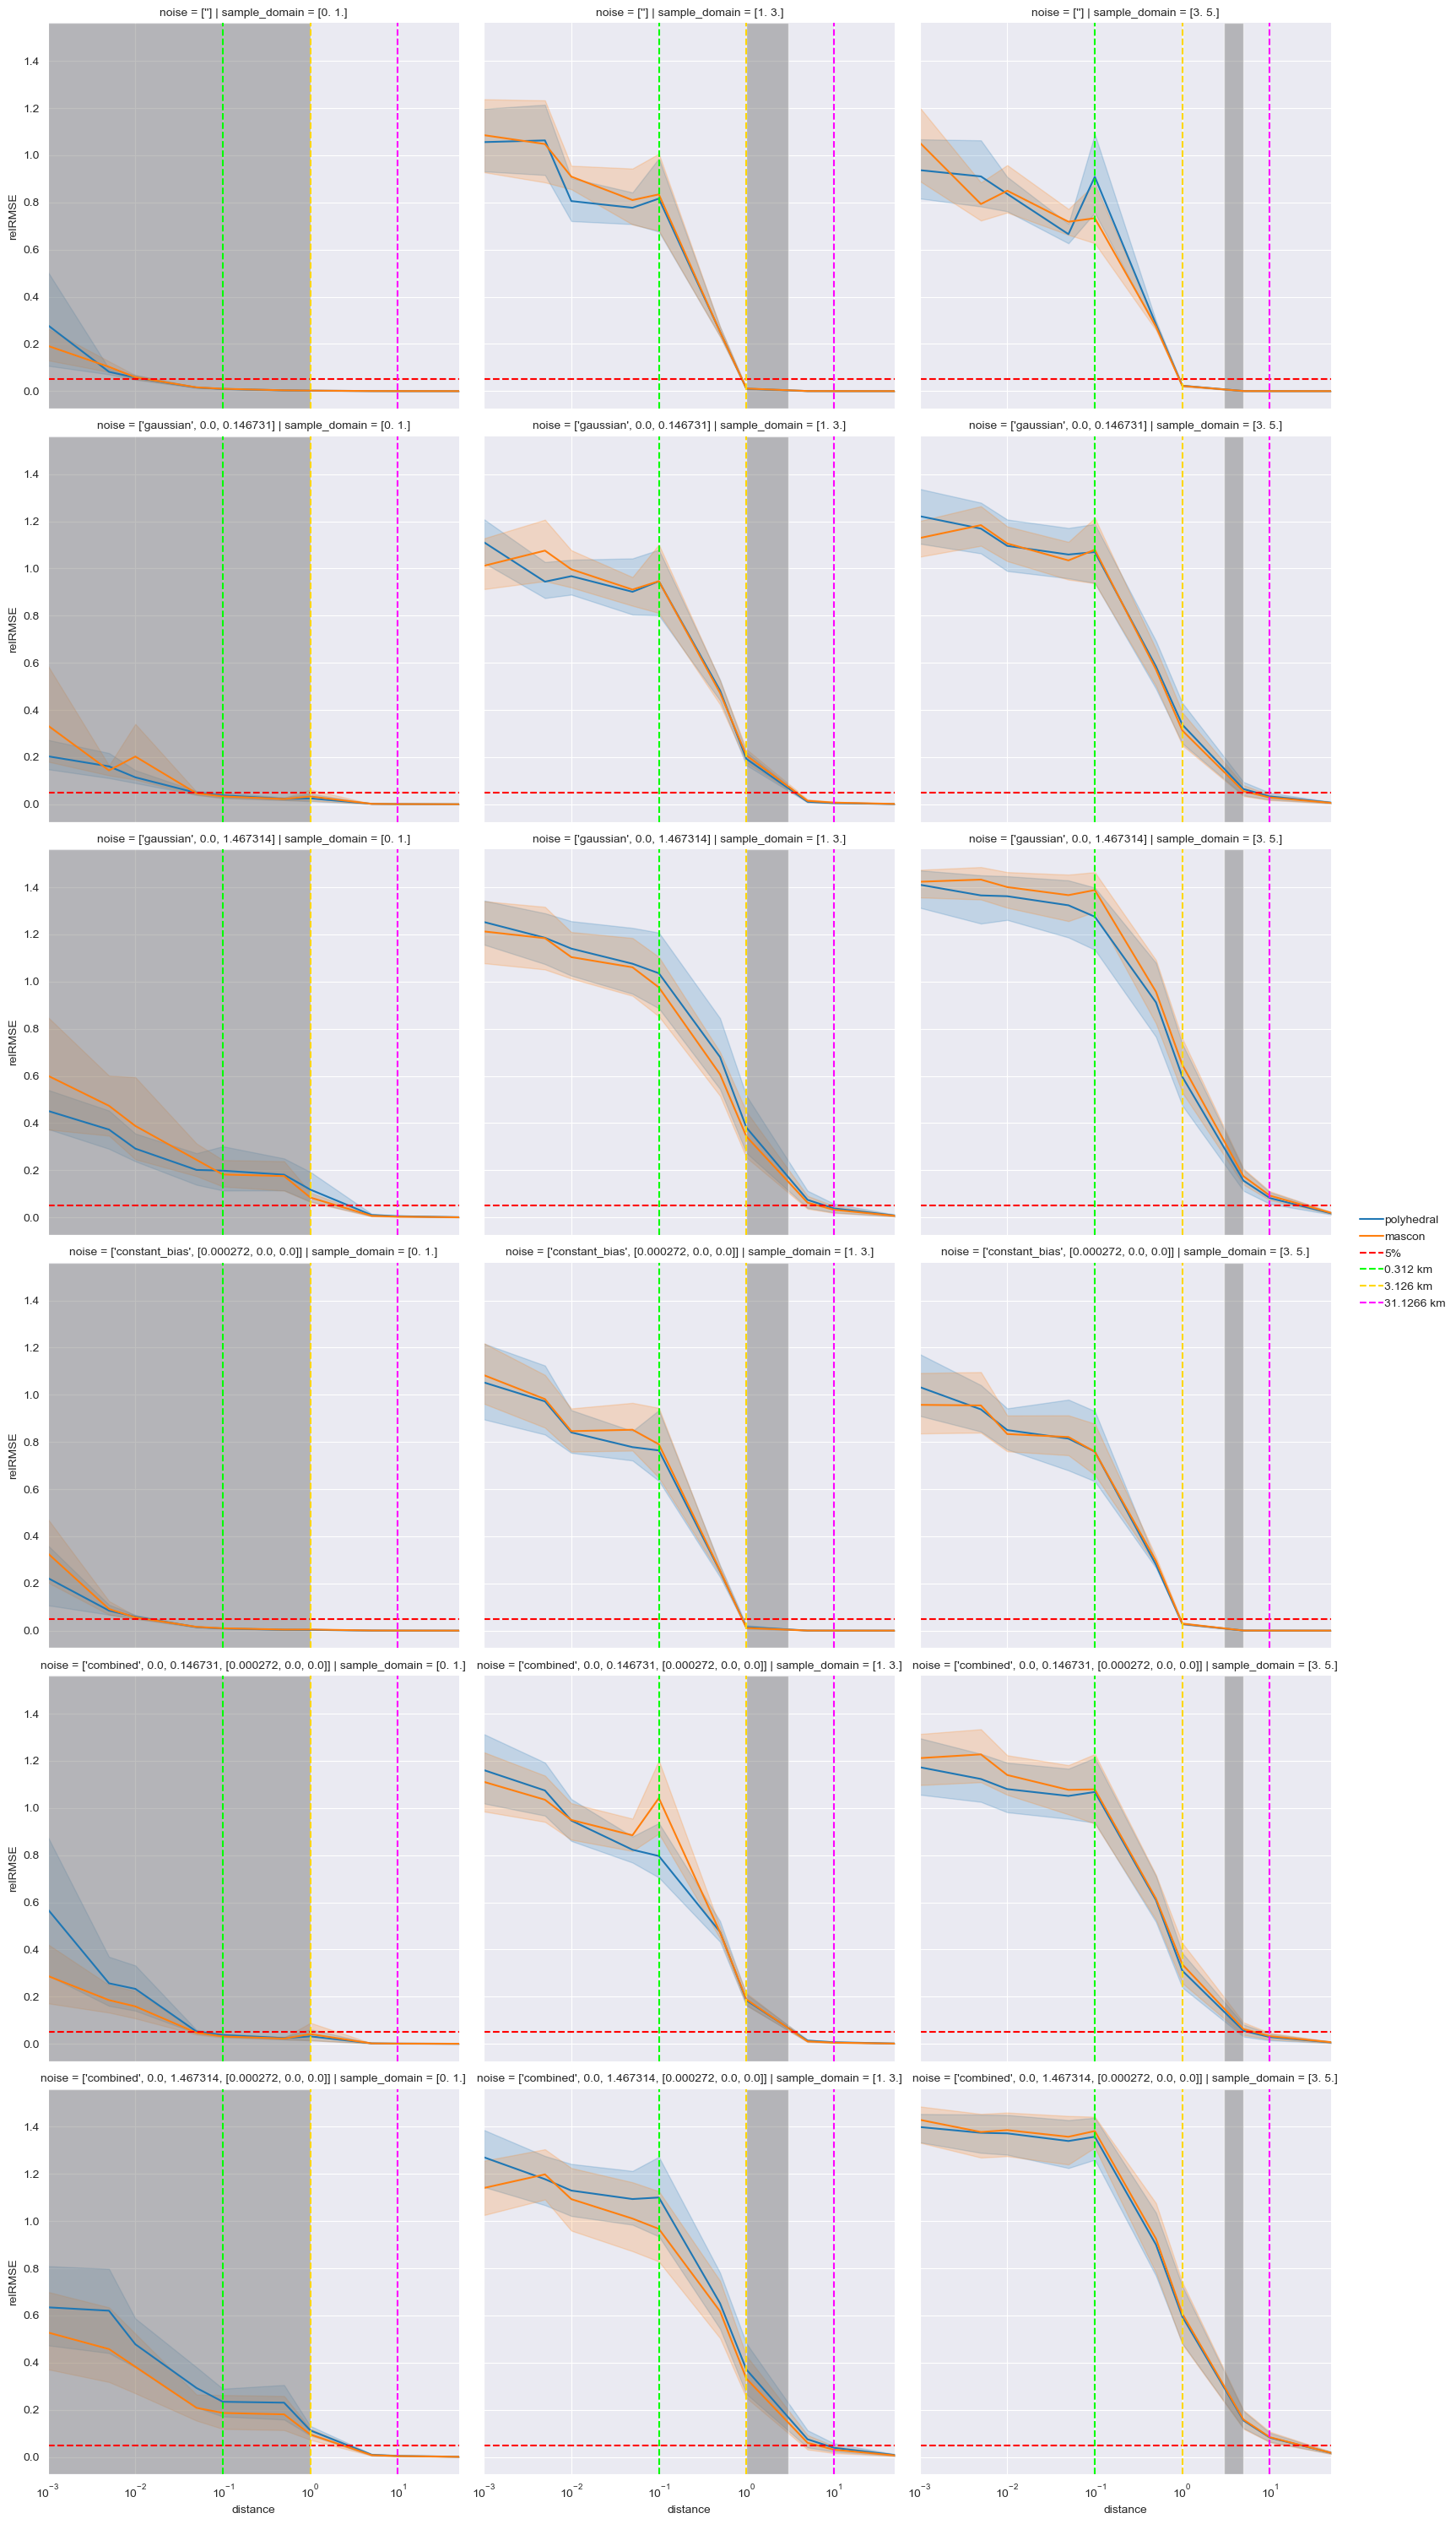

In [63]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.set(xlim=(0.0, 50.0), xscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"cg_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

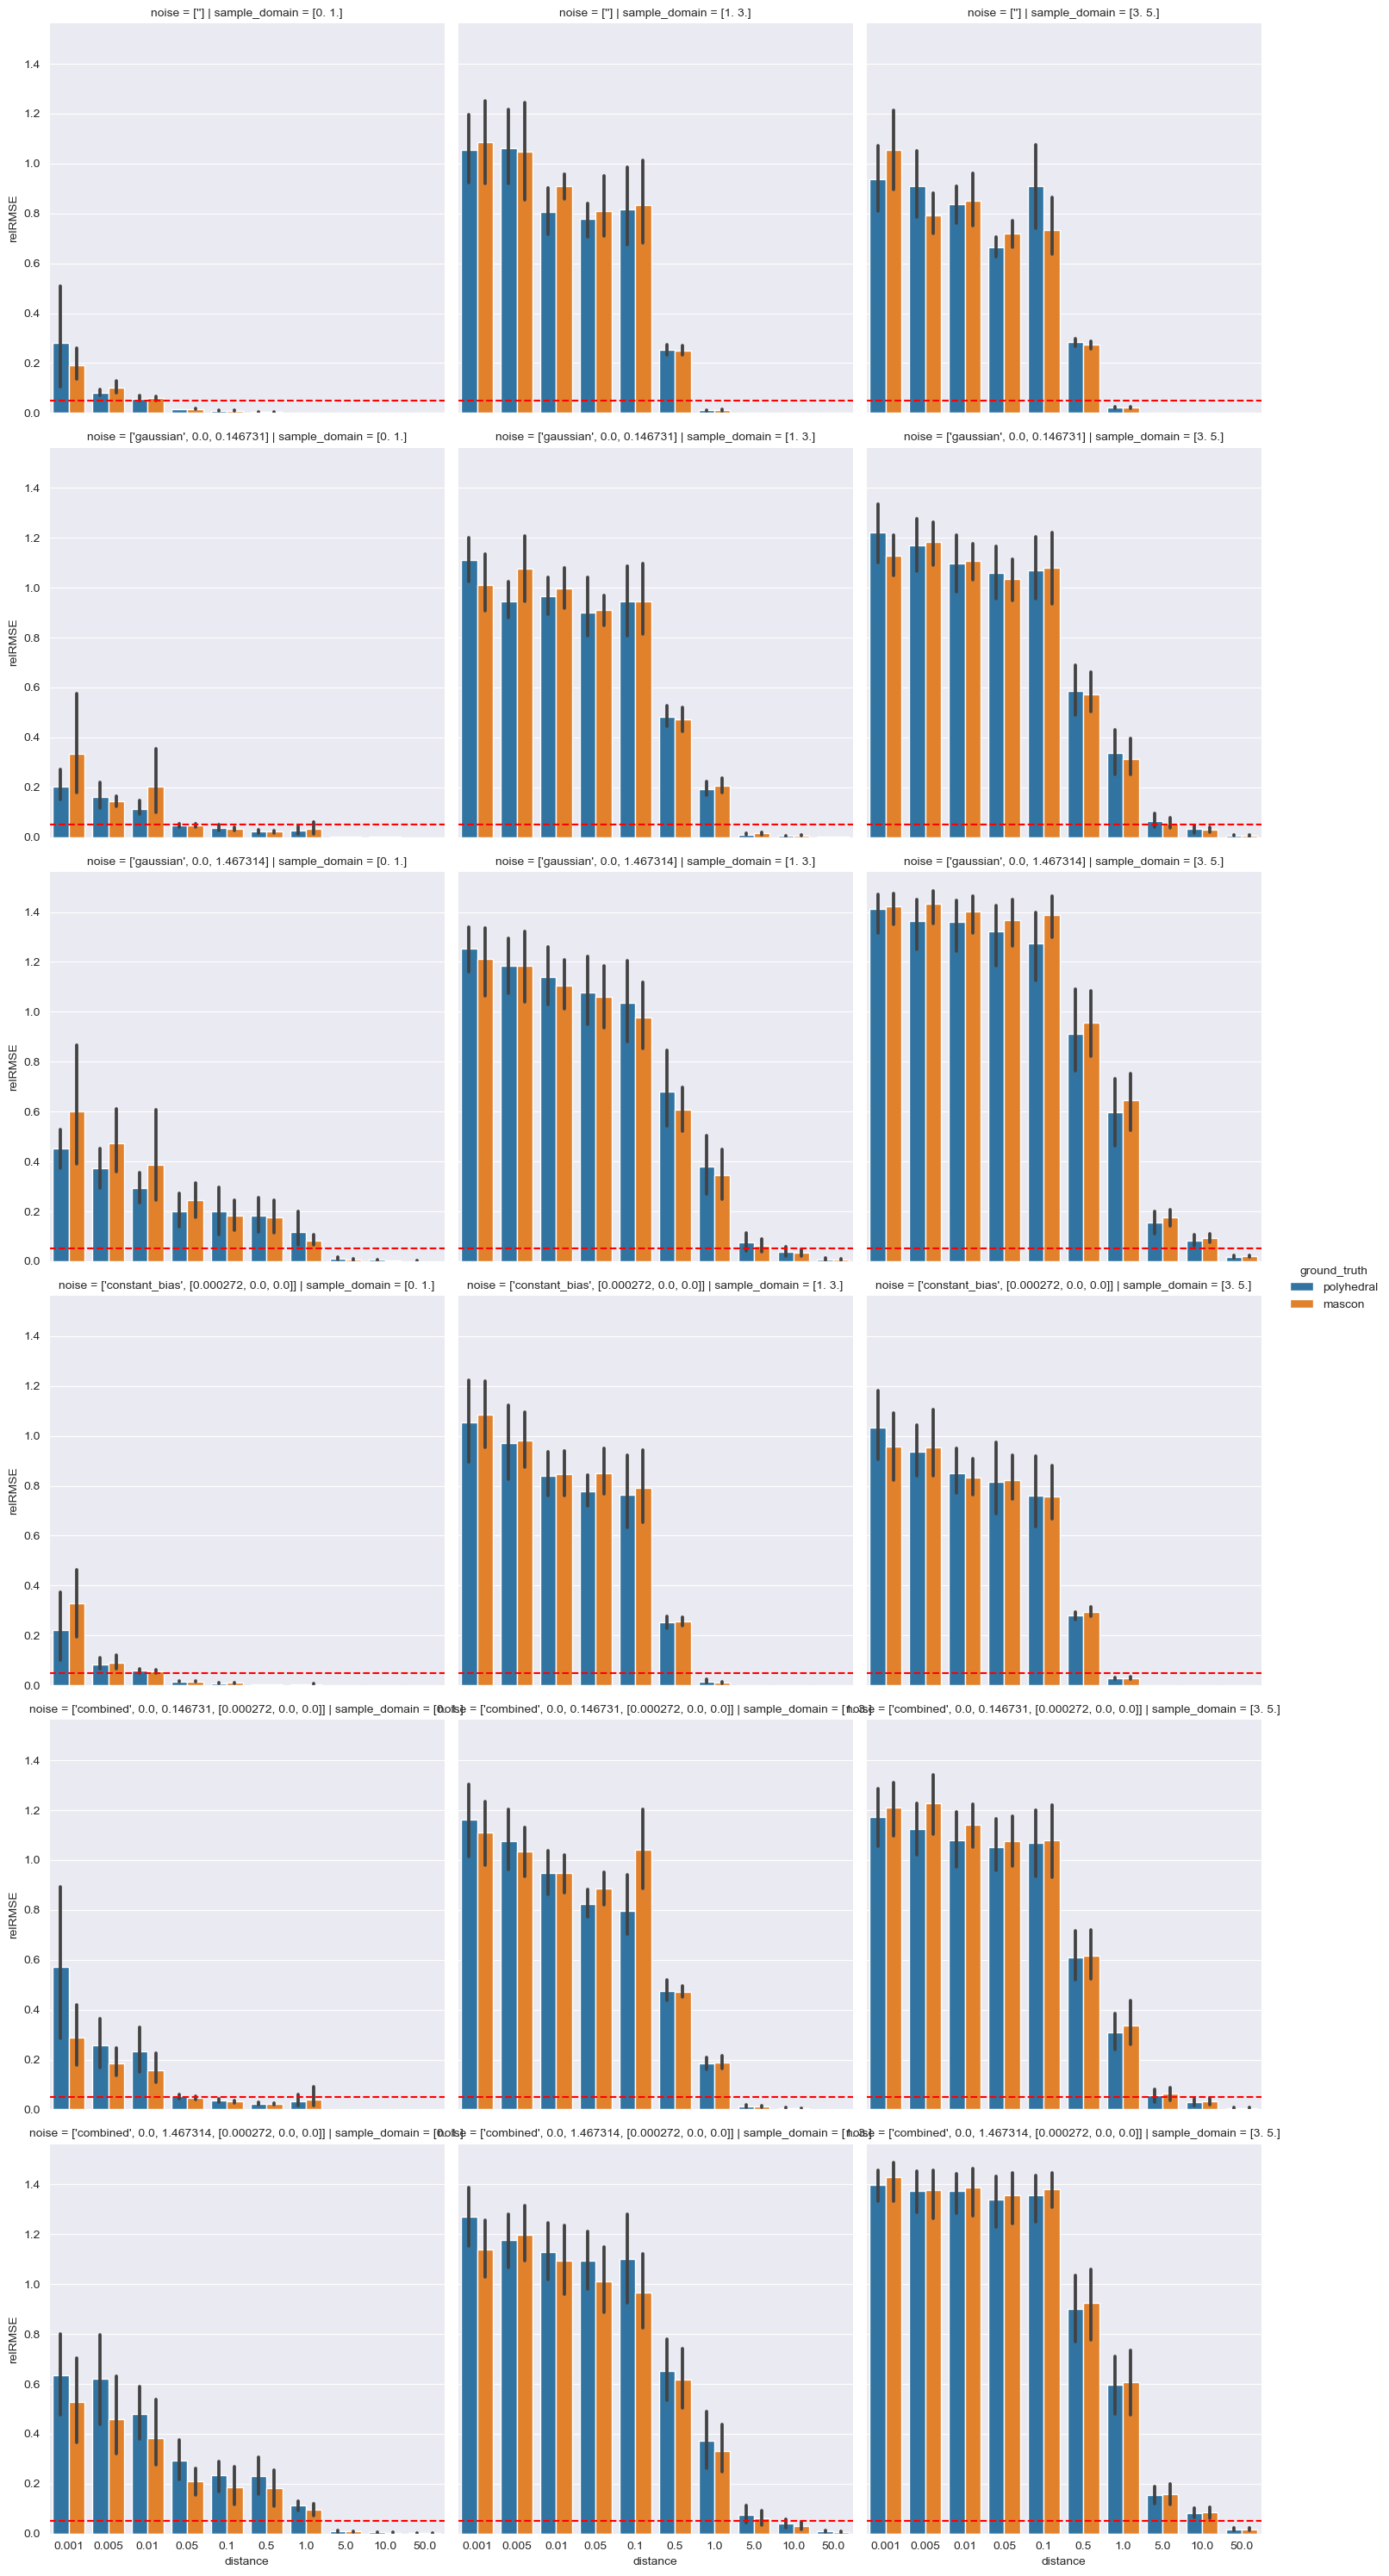

In [47]:
g = sns.catplot(
    data=dfm, kind="bar",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.map(plt.axhline, y=0.05, ls='--', c='red')
# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
save_path = os.path.join(output_directory, f"cg_norm_{error_of_interest}_bar.png")
g.savefig(save_path, dpi=300)